In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


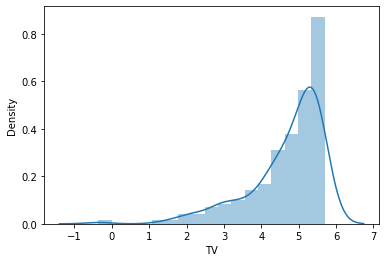

In [ ]:
#tv data is left skewed slightly
sns.distplot(np.log(df["TV"]))

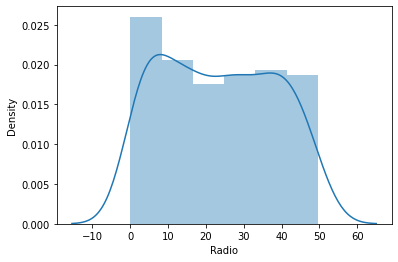

In [ ]:
sns.distplot(df["Radio"])

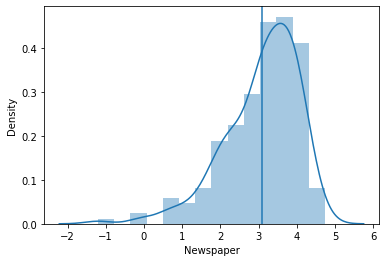

In [ ]:
sns.distplot(np.log(df["Newspaper"]))
plt.axvline(np.log(df["Newspaper"]).mean())

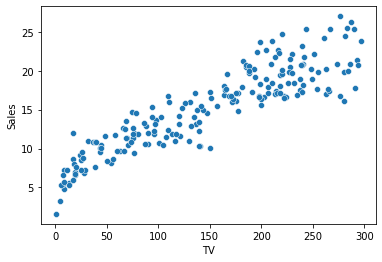

In [ ]:
sns.scatterplot(df["TV"],df["Sales"])

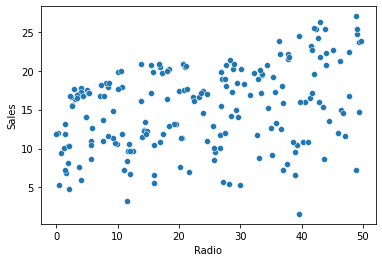

In [ ]:
sns.scatterplot(df["Radio"],df["Sales"])

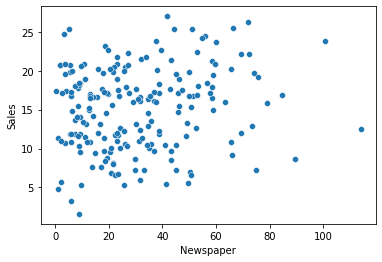

In [ ]:
sns.scatterplot(df["Newspaper"],df["Sales"])

**simple linear regression**

In [ ]:
#feature or independent variable
X=df[["TV"]]
#target or dependent variable
y=df[["Sales"]]

In [ ]:
X

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [ ]:
y

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9
...,...
195,7.6
196,14.0
197,14.8
198,25.5


In [ ]:
#dividing data into train and test
from sklearn.model_selection import train_test_split

In [ ]:
from pandas.core.common import random_state
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [ ]:
X_train.shape

(160, 1)

In [ ]:
y_train.shape

(160, 1)

In [ ]:
X_test.shape

(40, 1)

In [ ]:
y_test.shape

(40, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
se=StandardScaler()

In [ ]:
X_train=se.fit_transform(X_train)
X_test=se.transform(X_test)

**model building**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg=LinearRegression()

In [ ]:
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred_train=reg.predict(X_train)

In [ ]:
y_pred_test=reg.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
# test data
print("r2score",metrics.r2_score(y_test,y_pred_test))

2.29797221206146
r2score 0.8353708570111552


In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))
#train data
print("r2score",metrics.r2_score(y_train,y_pred_train))

2.2869621289992454
r2score 0.8037445271259666


Text(0.5, 1.0, 'Sales vs Spending')

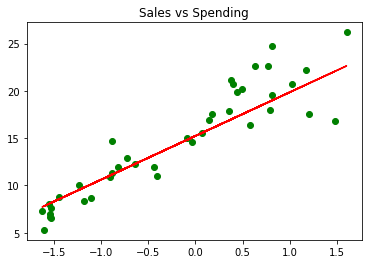

In [ ]:
plt.scatter(X_test,y_test,color="green")#actual value
plt.plot(X_test,y_pred_test,color="red")# predicted values
plt.title("Sales vs Spending")


***multiple linear regression***

In [ ]:
df=pd.read_csv("advertising.csv")

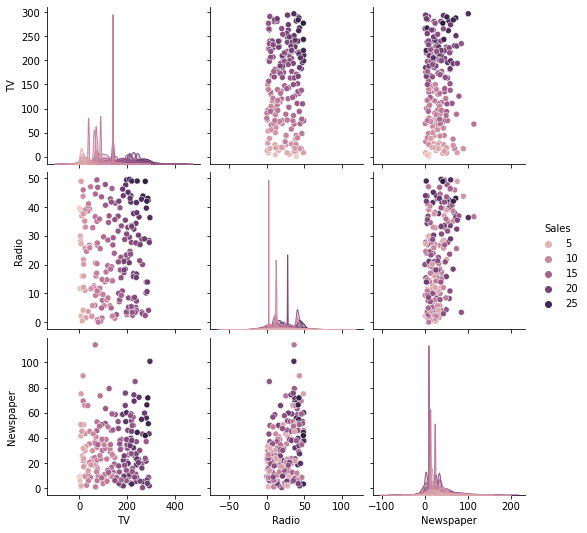

In [ ]:
sns.pairplot(df,hue="Sales")

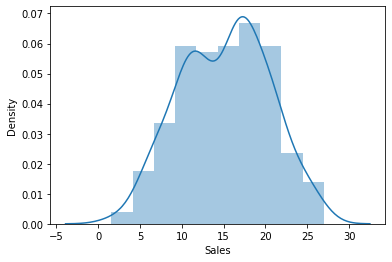

In [ ]:
sns.distplot(df["Sales"])

In [ ]:
#getting independent variable
X=df.iloc[:,:-1]
#getting dependent variable
y=df.iloc[:,-1]

In [ ]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

**split data into train and split data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [ ]:
X_train.shape

(160, 3)

In [ ]:
X_test.shape

(40, 3)

In [ ]:
y_train.shape

(160,)

In [ ]:
y_test.shape

(40,)

**data ready noe model building**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
mlr=LinearRegression()

In [ ]:
mlr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_train_pred=mlr.predict(X_train)
y_test_pred=mlr.predict(X_test)

** for evaluation creating function**

In [ ]:

from sklearn.metrics import r2_score,mean_squared_error
def model_performance(y_actual,y_pred):
  r2=r2_score(y_actual,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_actual,y_pred))
  print("r2 score:{}|RMSE:{}".format(round(r2,2),round(RMSE,2)))

In [ ]:
print("Train Performance")
model_performance(y_train,y_train_pred)
print("Test Performance")
model_performance(y_test,y_test_pred)

Train Performance
r2 score:0.9|RMSE:1.65
Test Performance
r2 score:0.92|RMSE:1.62


In [ ]:
mlr.intercept_

4.662533203076032

In [ ]:
mlr.coef_

array([0.05387138, 0.10574111, 0.00027908])

In [ ]:
pd.DataFrame(mlr.coef_,X.columns,columns=["coef"])

,coef
TV,0.053871
Radio,0.105741
Newspaper,0.000279


In [ ]:
mlr.coef_[0]

0.053871376220124854

In [ ]:
#predicting sales for 150$(tv,radio,newspaper)
#invest in these and then you get profit of 24$
mlr.predict([[150,123,150]])[0]

25.79125818110738